In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
y = np.array([0.050, 0.127, 0.094, 0.2122, 0.2779, 0.2665, 0.3317])

p0 = [1,1]

J = np.zeros([len(x), len(p0)])
Iter = 0
while True:
    Iter += 1
    j1 = -(x/(p0[1]+x))
    j2 = ((p0[0]*x)/(p0[1]+x)**2)
    J[:,0] = j1
    J[:,1] = j2

    r = y - ((p0[0]*x/(p0[1]+x)))

    t1 = np.linalg.inv(np.dot(J.T, J))
    t2 = np.dot(t1, J.T)
    t3 = np.dot(t2, r)

    
    p1 = p0 - t3
    t4 = abs(p1-p0)

    if max(t4) <= 1e-6:
        break
    p0 = p1


c1 = float('{:.4f}'.format(p0[0]))
c2 = float('{:.4f}'.format(p0[1]))

print(f'The constants are :\nC1 = {c1}\nC2 = {c2}\n\nIterations = {Iter}')




The constants are :
C1 = 0.3627
C2 = 0.553

Iterations = 8


0.8789611958588744


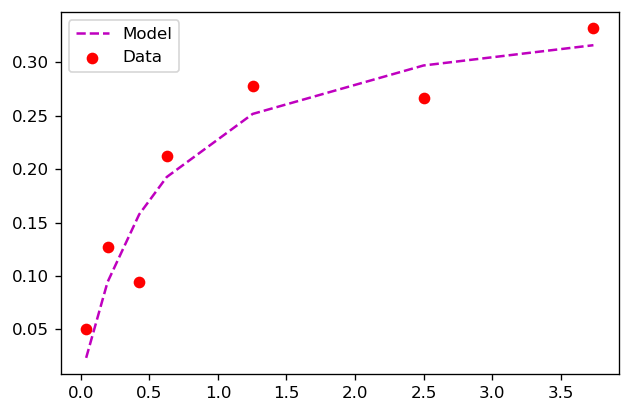

In [3]:
pred = c1*x/(c2+x)
plt.figure(1, figsize = (6,4), dpi = 120)
plt.scatter(x=x, y=y, c='red', marker='o', label ='Data')
plt.plot(x,pred, '--m', label='Model')
plt.legend()

ssr = np.sum((y-pred)**2)
sse = np.sum((y-np.mean(y))**2)
r2 = 1-(ssr/sse)
print(r2)